# ML Course 3 - Practice (solution)

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE (L)** e.g. 2.0
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [3]:
data = pd.read_csv("FuelConsumption.csv")

In [4]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
216,2014,CHEVROLET,EXPRESS 1500 CARGO CONV,VAN - CARGO,5.3,8,A4,E,23.9,18.5,21.5,13,344
47,2014,AUDI,R8,TWO-SEATER,5.2,10,M6,Z,21.1,13.8,17.8,16,409
499,2014,HONDA,PILOT,SUV - SMALL,3.5,6,A5,X,13.3,9.3,11.5,25,265
303,2014,DODGE,CHARGER,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
465,2014,GMC,TERRAIN,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259
426,2014,FORD,TAURUS FFV AWD,FULL-SIZE,3.5,6,AS6,X,13.0,9.1,11.2,25,258


1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
5. Plot the regression line over the data.
6. Plot the distribution of the residuals (i.e. the error terms).
7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance?
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
* Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook!

## Suggestion of solution

Check for missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


#### 1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 

In [6]:
correlation = data[['ENGINESIZE','CO2EMISSIONS']].corr()
# Alternative: data['ENGINESIZE'].corr(data['CO2EMISSIONS'])
print('Correlation between CO2 emission and engine size is ' + str(correlation['CO2EMISSIONS']['ENGINESIZE']))

Correlation between CO2 emission and engine size is 0.8741543683958124


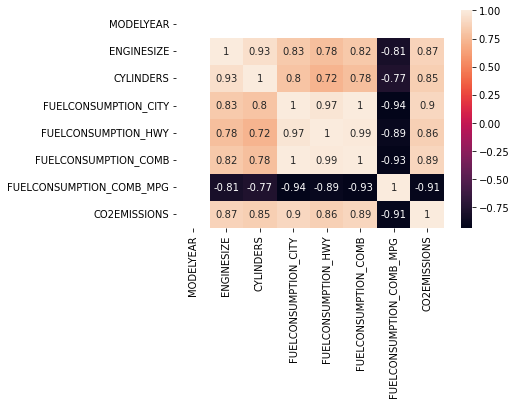

In [12]:
_ = sns.heatmap(data.corr(), annot=True)

ENGINESIZE is well correlated with CO2EMISSIONS (correlation of 0.87 is rather close to 1) so it can be taken as a unique predictor for the CO2 emission.

### Regression using Engine size as a feature

#### 2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?

In [8]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

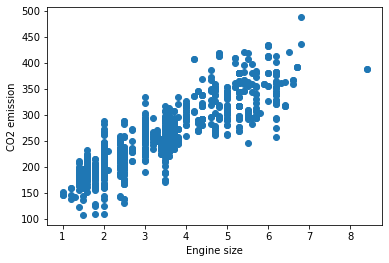

In [9]:
plt.scatter(X, y)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

The scatter plot looks linear so probably the regression model will fit well.

#### 3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

#### 4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 

In [58]:
print('Coefficient: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficient:  39.402327242572234
Intercept:  126.10080982853711


If the engine size is increased by 1 L, according to our model, the CO2 emission will increase by around 39.4 g/km.

#### 5. Plot the fit line over the data.

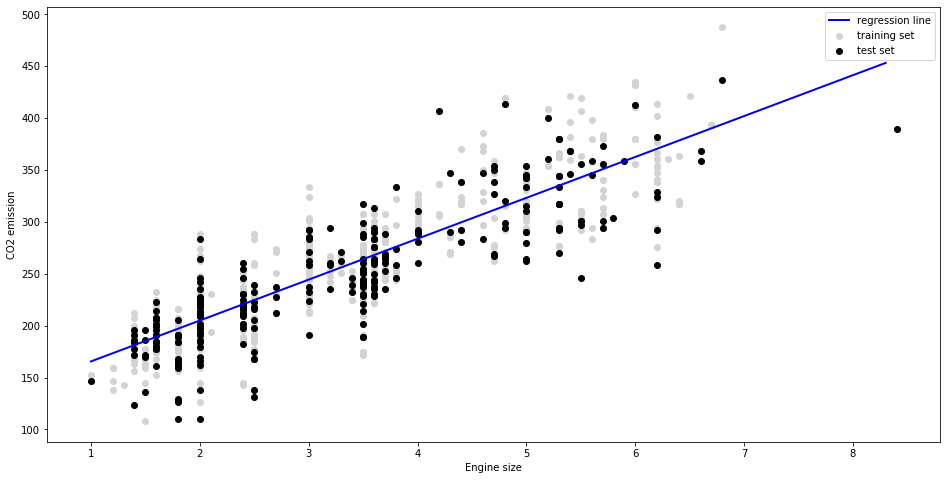

In [59]:
X_plot = np.arange(min(X), max(X), 0.1)
y_plot = regr.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

#### 6. Plot the distribution of the residuals (i.e. the error terms).

In [16]:
y_pred = regr.predict(X_test)

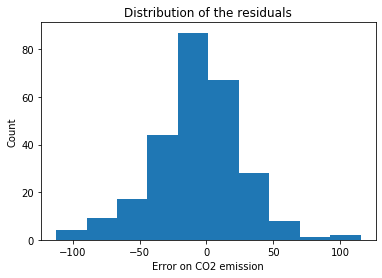

In [17]:
residuals =  y_test - y_pred
plt.hist(x=residuals)
plt.xlabel('Error on CO2 emission')
plt.ylabel('Count')
plt.title("Distribution of the residuals")
plt.show()

#### 7. Evaluate the performance of the model (MSE, RMSE, MAE, 𝑅2).

In [18]:
from sklearn.metrics import r2_score

def evaluate_regression(y_test, y_pred):
    print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))
    print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
    print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))

evaluate_regression(y_test, y_pred)

Mean square error (MSE): 1139.99
Root mean square error (RMSE): 33.76
Mean absolute error (MAE): 25.60
Coefficient of determination (R^2): 0.72


### Untrained regression (coefficients = 0)
#### 8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance?

An "untrained" linear regression model that has both coefficients equal to 0 would always predict a CO2 emission of 0. You can simply generate the prediction vector of 0s.

In [75]:
y_pred_untrained = np.zeros(X_test.shape)
y_pred_untrained[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Or, if you wish, you can reassign the coefficients to an existing linear regression model, but the method is more convoluted.

In [74]:
from copy import deepcopy

regr_untrained = deepcopy(regr)
regr_untrained.intercept_ = np.zeros((1,))
regr_untrained.coef_ = np.zeros((1,1))

y_pred_untrained = regr_untrained.predict(X_test)
y_pred_untrained[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [69]:
evaluate_regression(y_test, y_pred_untrained)

Mean square error (MSE): 66408.87
Root mean square error (RMSE): 257.70
Mean absolute error (MAE): 249.67
Coefficient of determination (R^2): -15.29


The performance is awful. All error measures are way higher than in question 7. This is expected for a model that always predicts a CO2 emission of zero regardless of the feature value.  
We can also notice that the $R^2$ coefficient is **negative**. This happens when the model is **worse** than a model that just predicts the **expected C02 emissions**

### Regression using Combined fuel consumption as a feature
#### 9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?

In [24]:
X = data['FUELCONSUMPTION_COMB'].values.reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regr.predict(X_test)

evaluate_regression(y_test, y_pred)

Mean square error (MSE): 792.17
Root mean square error (RMSE): 28.15
Mean absolute error (MAE): 20.22
Coefficient of determination (R^2): 0.81


The RMSE is lower here (28.15 here vs. 33.76 before), and the $R^2$ coefficient is higher (0.81 vs 0.72) so it seems that combined fuel consumption is a slightly better predictor than engine size for CO2 consumption prediction.

### Dummy model that predicts the mean CO2
#### 10. Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why? 

The mean CO2 is calculated on the training set.

In [33]:
y_train_mean = y_train.mean()
y_pred_dummy = np.full(X_test.shape, y_train_mean)

In [34]:
evaluate_regression(y_test, y_pred_dummy)

Mean square error (MSE): 4152.03
Root mean square error (RMSE): 64.44
Mean absolute error (MAE): 52.88
Coefficient of determination (R^2): -0.02


The performance is worse than for the linear regression models, which is to be expected for a dummy model. 
We notice that the $R^2$ coefficient is close to 0. By definition, the $R^2$ coefficient is equal to 0 for a model that returns the **expected value of y**. Since the mean of y_train is a close estimation of the expectation of y, this is why the coefficient of determination is about 0.